# 3. Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de 4 entradas (utilizando el algoritmo Backpropagation y actualizando en batch). Muestre cómo evoluciona el error durante el entrenamiento. 

## Perceptrón multicapa para XOR (2 entradas)

Entrenamos una red con una capa oculta de 4 neuronas y una neurona de salida. El entrenamiento se realiza con Backpropagation en modo batch (se usan los 4 patrones en cada actualización).

In [1]:
import numpy as np

In [2]:

import math

def perceptron_2layers_train(x, y, N, eta, error):
    x = np.array([np.append(item, 1) for item in x])
    W = [np.random.normal(0, 1, N + 1)]
    W.insert(0, [np.random.normal(0, 1, int(np.size(x) / len(x))) for _ in range(N)])
    h_j = []
    h_i = []
    for l, item in enumerate(x):
        for m, weights in enumerate(W):
            if m == 0:
                h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                V = np.tanh(h_j)
            else:
                h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                O = np.tanh(h_i)
    z = y - O
    error_history = []
    E = sum([z[i] ** 2 for i in range(len(y))]) / len(y)
    error_history.append(E)
    while E > error:
        delta_i = np.array([z[i] * (1 - math.tanh(h_i[i]) ** 2) for i in range(len(y))])
        delta_j = np.array([
            np.array([
                delta_i[i] * W[1][j] * (1 - math.tanh(h_j[i][j]) ** 2)
                for j in range(N)
            ])
            for i in range(len(y))
        ])
        for i in range(len(y)):
            for l in range(len(W) - 1, -1, -1):
                for j in range(len(W[l])):
                    if l == 1:
                        if j < len(W[l]) - 1:
                            W[l][j] += eta * delta_i[i] * V[i][j]
                        else:
                            W[l][j] += eta * delta_i[i]
                    else:
                        for k in range(len(W[l][j])):
                            W[l][j][k] += eta * delta_j[i][j] * x[i][k]
        h_j = []
        h_i = []
        for l, item in enumerate(x):
            for m, weights in enumerate(W):
                if m == 0:
                    h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                    V = np.tanh(h_j)
                else:
                    h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                    O = np.tanh(h_i)
        z = y - O
        E = sum([z[i] ** 2 for i in range(len(y))]) / len(y)
        error_history.append(E)
    return W, error_history

def perceptron_2layers(x, y, W):
    x = np.array([np.append(item, 1) for item in x])
    h_j = []
    h_i = []
    for l, item in enumerate(x):
        for m, weights in enumerate(W):
            if m == 0:
                h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                V = np.tanh(h_j)
            else:
                h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                O = np.tanh(h_i)
    return O


In [ ]:

x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])
N = 2
eta = 0.1
error = 0.001
W, error_hist_2 = perceptron_2layers_train(x, y, N, eta, error)
O = perceptron_2layers(x, y, W=W)
O


In [ ]:
np.round(O).astype(int) == y

array([ True,  True,  True,  True])

In [ ]:

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Evolución del error durante el entrenamiento (XOR de 2 entradas)', fontweight='bold')
ax.set_ylabel('Error')
ax.set_xlabel('Iteraciones')
ax.plot(error_hist_2, 'k')
ax.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig('TP2/ejercicio-3/evolucion-error-2-entradas.png', dpi=150, bbox_inches='tight')
plt.show()


### XOR de 4 entradas

Entrenamiento del mismo perceptrón de dos capas para la versión de XOR con cuatro entradas (paridad impar).


In [ ]:

import itertools


x4 = np.array(list(itertools.product([-1, 1], repeat=4)))
y4 = np.array([1 if (np.sum(sample == 1) % 2) else -1 for sample in x4])
N4 = 4
eta4 = 0.1
error4 = 0.001
W4, error_hist_4 = perceptron_2layers_train(x4, y4, N4, eta4, error4)
O4 = perceptron_2layers(x4, y4, W=W4)
print('Accuracy XOR 4 entradas:', np.mean(np.round(O4).astype(int) == y4))


NameError: name 'itertools' is not defined

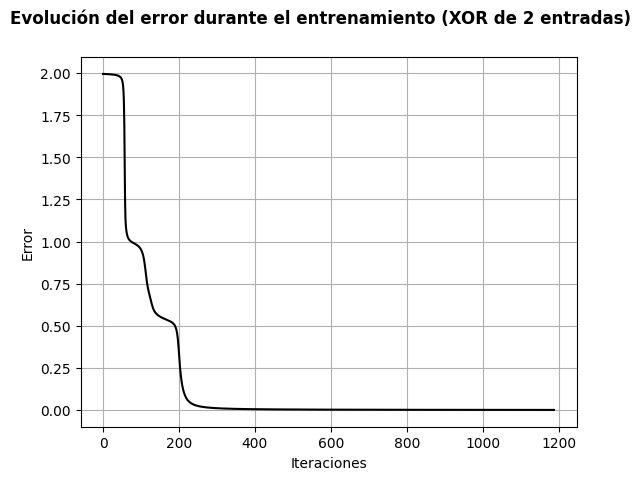

In [ ]:

fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('Evolución del error durante el entrenamiento (XOR de 4 entradas)', fontweight='bold')
ax.set_ylabel('Error')
ax.set_xlabel('Iteraciones')
ax.plot(error_hist_4, 'k')
ax.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig('TP2/ejercicio-3/evolucion-error-4-entradas.png', dpi=150, bbox_inches='tight')
plt.show()
